In [38]:
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from datetime import datetime

In [19]:
root = ET.parse('On_the_dot.gpx').getroot()

In [41]:
trk = root[1]
seg = trk[2]
point = seg[10]

frame = {}
frame['lat'] =  [float(x.get('lat')) for x in seg]
frame['lon'] =  [float(x.get('lon')) for x in seg]
frame['ele'] =  [float(x[0].text) for x in seg]
frame['time'] =  [datetime.strptime(x[1].text, '%Y-%m-%dT%H:%M:%SZ') for x in seg]

df = pd.DataFrame(frame)

In [145]:
df.head()

,lat,lon,ele,time,cart,delta_dist,delta_time,speed,delta_ele
0,40.007023,-105.257168,1616.5,2019-06-21 17:04:46,"[-4709.164363857525, -1284.4985161708526, 4096...",NaN,NaN,NaN,NaN
1,40.007080,-105.257207,1616.6,2019-06-21 17:04:47,"[-4709.1596313832, -1284.500669225206, 4096.84...",0.007158,0.000278,25.769875,0.1
2,40.007135,-105.257238,1616.8,2019-06-21 17:04:48,"[-4709.15529011698, -1284.502222539639, 4096.8...",0.006666,0.000278,23.997671,0.2
3,40.007142,-105.257290,1616.9,2019-06-21 17:04:58,"[-4709.153715351739, -1284.5063848745742, 4096...",0.004499,0.002778,1.619654,0.1
4,40.007130,-105.257352,1617.1,2019-06-21 17:05:00,"[-4709.1533009714485, -1284.511746779975, 4096...",0.005452,0.000556,9.812974,0.2


In [100]:
def to_cartesian(Lat, Long,ele):
    Lat = np.deg2rad(Lat) # Convert degrees to radians for numpy trig
    Long = np.deg2rad(Long)
    
    earth_radius = 6371 # km
    radius = earth_radius + (ele/1000)
    x_pos = radius*np.cos(Lat)*np.sin(Long) # Convert spherical coordinates to cartesian
    y_pos = radius*np.cos(Lat)*np.cos(Long) # Assumes earths radius = 1
    z_pos = radius*np.sin(Lat)
    
    pos = pd.concat([x_pos,y_pos,z_pos],axis=1)
    return [np.array(x) for x in pos.values]

def distance(p1,p2):
    if p1 is None or p2 is None:
        return None
    return sum((p2-p1)**2)**.5

In [101]:
df['cart'] = to_cartesian(df.lat,df.lon, df.ele)

In [104]:
prev_point = None
dists = []
for point in df.cart:
    dists.append(distance(prev_point, point))
    prev_point = point
    
df['delta_dist'] = dists

In [128]:
df['delta_time'] = df.time.diff() / np.timedelta64(1, 'h')

In [129]:
df['speed'] = df.delta_dist / df.delta_time

In [144]:
df['delta_ele'] = df.ele.diff()

In [117]:
df.dtypes

lat                   float64
lon                   float64
ele                   float64
time           datetime64[ns]
cart                   object
delta_dist            float64
delta_time    timedelta64[ns]
dtype: object

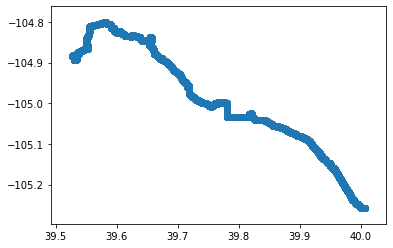

In [10]:
plt.scatter(df.lat,df.lon)
plt.show()

In [83]:
a = [1,2]
a**2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'